In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df=pd.read_csv('E:\\All Datasets\\\Advertising.csv')
df.head(2)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


## Dataset Understanding

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
# total spend
df['total_spend']=df.TV+df.radio+df.newspaper
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [7]:
df.drop(columns=['TV','radio','newspaper'],inplace=True)
df.head(3)

,sales,total_spend
0,22.1,337.1
1,10.4,128.9
2,9.3,132.4


## Data preprocessing

**EDA**

In [8]:
df.describe()

,sales,total_spend
count,200.000000,200.000000
mean,14.022500,200.860500
std,5.217457,92.985181
min,1.600000,11.700000
25%,10.375000,123.550000
50%,12.900000,207.350000
75%,17.400000,281.125000
max,27.000000,433.600000


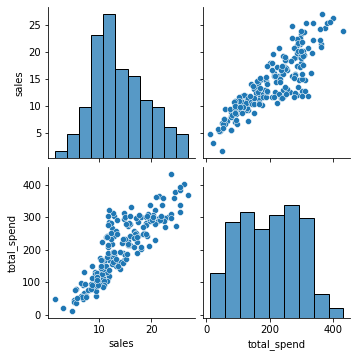

In [9]:
sns.pairplot(df)
plt.show()

In [11]:
df.corr()

,sales,total_spend
sales,1.000000,0.867712
total_spend,0.867712,1.000000


**Data Cleaning**

In [12]:
df.isnull().sum()

sales          0
total_spend    0
dtype: int64

In [13]:
# data_wrangling

**Train test split**

In [14]:
x=df.drop(columns=['sales'])
x.head(3)

,total_spend
0,337.1
1,128.9
2,132.4


In [15]:
y=df['sales']
y.head(2)

0    22.1
1    10.4
Name: sales, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=99)

## Modelling

In [17]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

# fit
model.fit(x_train,y_train)


# ith train kelav

LinearRegression()

In [15]:
#print intercept
model.intercept_       # here is c    y=mx+c

4.237345227407433

In [18]:
model.coef_      # slope   here m


array([0.04871214])

**Prediction**

In [19]:
# mnj ith apan x values tevun y kadu laglav
train_predictions=model.predict(x_train)
test_predictions=model.predict(x_test)

In [25]:
pd.DataFrame(train_predictions).head(2)

,0
0,18.378478
1,19.079933


In [24]:
pd.DataFrame(test_predictions).head(2)

,0
0,9.293665
1,8.592210


## Evaluation

In [26]:
from sklearn.metrics import mean_squared_error
print('MAE of test',mean_squared_error(y_test,test_predictions))
print('MAE of train',mean_squared_error(y_train,train_predictions))

MAE of test 6.781904117150695
MAE of train 6.662332761128649


In [21]:
print('RMSE of test',np.sqrt(mean_squared_error(y_test,test_predictions)))
print('RMSE of train',np.sqrt(mean_squared_error(y_train,train_predictions)))

RMSE of test 2.6042089234834243
RMSE of train 2.581149503831316


In [22]:
from sklearn.metrics import r2_score
print('r2 for test',r2_score(y_test,test_predictions))
print('r2 for train',r2_score(y_train,train_predictions))

r2 for test 0.7288188138126225
r2 for train 0.7563805981064332


In [23]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,x,y,cv=5)
print(scores)

cv_score=scores.mean()
cv_score

[0.74964192 0.79455226 0.76417134 0.74872042 0.65980565]


0.743378317855542

 ## is model is underfitting ot overfitting??
 - overfitting : train accuracy > test accuracy
 - underfitting : train accuracy < test accuracy
 - good model  : train accuracy is nearly equal to test accuracy  
 
### is test accuracy = cross validation mean score

## Checklist 

**Linearity of errors**


In [29]:
test_res=y_test-test_predictions
test_res.head(2)

135    2.306335
127    0.207790
Name: sales, dtype: float64

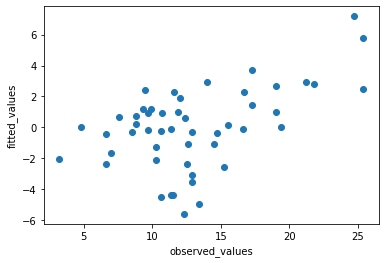

In [25]:
plt.scatter(y_test,test_res)
plt.xlabel('observed_values')
plt.ylabel('fitted_values')
plt.show()

**Normality of errors**

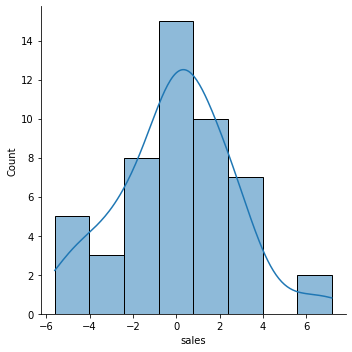

In [26]:
sns.displot(test_res,kde=True)
plt.show()

In [27]:
test_res.skew()   # it is nearly equal to normal

0.08032471743435565

**Equal varience of errors**

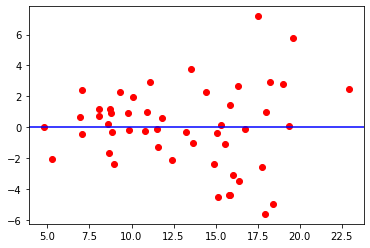

In [28]:
plt.scatter(test_predictions,test_res,c='r')
plt.axhline(y=0,color='blue')

**Variables Significance**

In [27]:
import statsmodels.formula.api as smf
m=smf.ols('y~x',data=df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           5.06e-62
Time:                        20:39:04   Log-Likelihood:                -473.88
No. Observations:                 200   AIC:                             951.8
Df Residuals:                     198   BIC:                             958.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2430      0.439      9.676      0.000       3.378       5.108
x              0.0487      0.002     24.564      0.000       0.045       0.053
==============================================================================
Omnibus:                        6.851   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.692
Skew:                          -0.373   Prob(JB):                       0.0352
Kurtosis:                       3.495   Cond. No.                         528.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Final Inferences


In [29]:
# if Total spend 200k how many units could 
#we expect to sell as result
model.predict([[200]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.97977246])

## save model

In [30]:
from joblib import dump

In [31]:
dump(model,'sales_model.joblib')

['sales_model.joblib']

## Load model

In [32]:
from joblib import load
loaded_model=load('sales_model.joblib')

In [33]:
loaded_model.predict([[200]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.97977246])